<a href="https://colab.research.google.com/github/andryll/MGR-IC/blob/main/codes/Feature%20Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando as bibliotecas necessárias

In [ ]:
pip install pandas

In [ ]:
import numpy as np
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import os
import pandas as pd

Montando o drive e importando algumas músicas


In [ ]:
!git clone https://github.com/andryll/MGR-IC.git

Cloning into 'MGR-IC'...
remote: Enumerating objects: 1016, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 1016 (delta 3), reused 8 (delta 0), pack-reused 999
Receiving objects: 100% (1016/1016), 1.12 GiB | 22.39 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Updating files: 100% (1003/1003), done.


In [ ]:
dir_path = '/content/MGR-IC/songs/blues/'

files = os.listdir(dir_path)

songs = []
for f in files:
  print(f)
  songs.append(librosa.load(os.path.join(dir_path, f), sr=44100, mono = True))

sr = 44100

In [ ]:
songs

In [ ]:
ipd.Audio(songs[1][0],rate = sr)

# Extração das Features
### Time Domain Features (TDF)


> Zero Crossing Rate

> Root Mean Square Energy



### Frequency Domain Features (FDF)

> MFCC

> Spectral Centroid

> Spectral Rolloff

In [ ]:
# Extraindo inicialmente a ZCR da primeira música (song0)
#   > Usando frame length 2048, hop length 512 e centralizando o feixe

zcrlist = []
rmslist = []
mfcclist = []
sctoidlist = []
srlofflist99 = []
srlofflist1 = []

for i in songs:
  zcr = librosa.feature.zero_crossing_rate(i[0], frame_length = 2048, hop_length = 512, center = True)
  rms = librosa.feature.rms(y=i[0], frame_length = 2048, hop_length = 512, center = True)
  mfcc = librosa.feature.mfcc(y=i[0], sr=sr)
  sctoid = librosa.feature.spectral_centroid(y=i[0], sr=sr, hop_length = 512, center = True)
  srloff99 = librosa.feature.spectral_rolloff(y=i[0], sr=sr, hop_length = 512, center = True, roll_percent=0.99)
  srloff1 = librosa.feature.spectral_rolloff(y=i[0], sr=sr, hop_length = 512, center = True, roll_percent=0.01)


  zcrlist.append(zcr)
  rmslist.append(rms)
  mfcclist.append(mfcc)
  sctoidlist.append(sctoid)
  srlofflist99.append(srloff99)
  srlofflist1.append(srloff1)



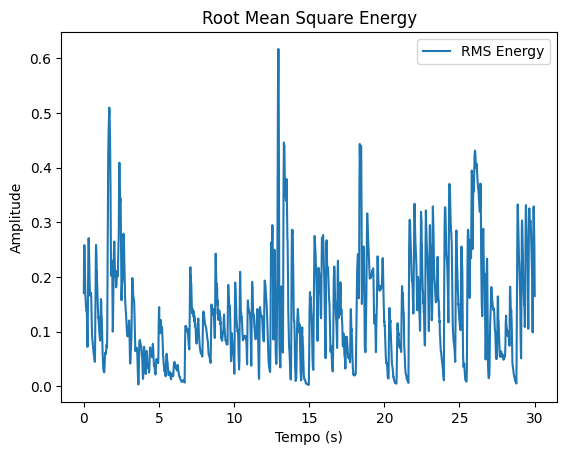

(1, 2586)


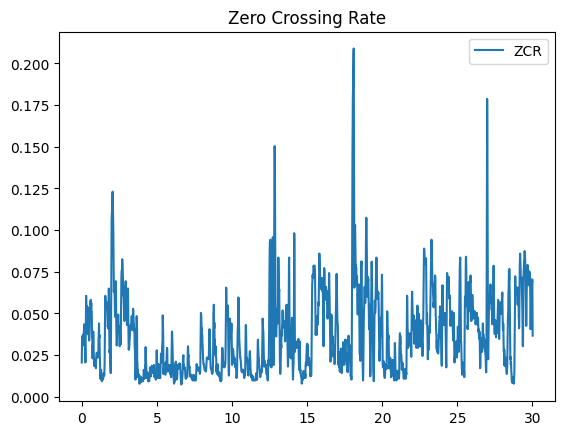

(0.0, 8192.0)

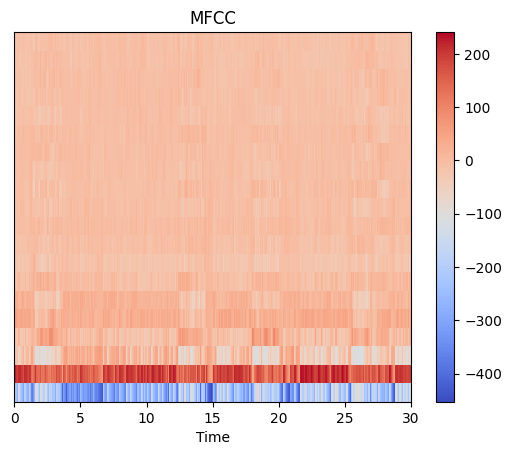

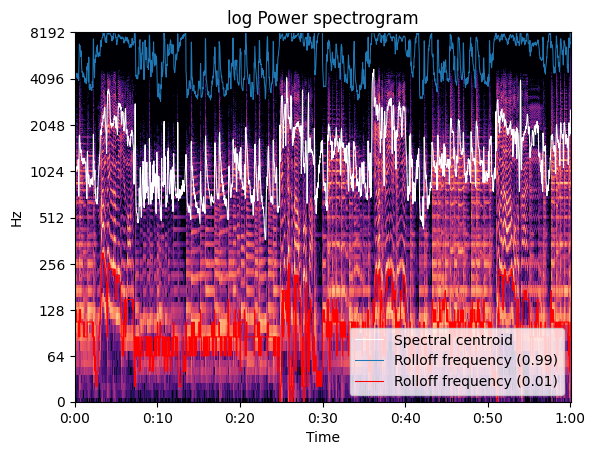

In [ ]:
# Printando diagramas
i = 87 #índice da música da lista

#plot do rms
times = librosa.times_like(rmslist[i], sr=sr)
plt.plot(times, rmslist[i][0], label='RMS Energy')
plt.xticks = []
plt.legend()
plt.title('Root Mean Square Energy')
plt.ylabel('Amplitude')
plt.xlabel('Tempo (s)')
plt.show()

#plot do zcr
print(zcrlist[i].shape)
plt.plot(times, zcrlist[i][0], label = 'ZCR')
plt.legend()
plt.title('Zero Crossing Rate')
plt.show()

#plot do mfcc
img = librosa.display.specshow(mfcclist[i], x_axis='time', sr=sr)
plt.colorbar(img)
plt.title('MFCC')

#plot do spectral centroid e rollof
fig, ax = plt.subplots()
S, phase = librosa.magphase(librosa.stft(y=songs[i][0]))
times2 = librosa.times_like(sctoidlist[i])
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time',ax=ax)
ax.plot(times2,sctoidlist[i].T, label='Spectral centroid', color = 'w', linewidth=0.75)
ax.plot(times2, srlofflist99[i][0], label = 'Rolloff frequency (0.99)', linewidth=0.75)
ax.plot(times2, srlofflist1[i][0], label = 'Rolloff frequency (0.01)', color='r', linewidth=0.75)
ax.legend(loc = 'lower right')
ax.set(title = 'log Power spectrogram')
ax.set_ylim(bottom=0, top = 8192)

In [ ]:
#Usando o pandas para criar um dataframe

df = pd.DataFrame({
    "ZCR":zcrlist,
    "RMS":rmslist,
    "MFCC":mfcclist,
    "Centroid":sctoidlist,
    "Rolloff (0.01)":srlofflist1,
    "Rolloff Max (0.99)":srlofflist99
})

df

,ZCR,RMS,MFCC,Centroid,Rollof (0.01),Rollof Max (0.99)
0,"[[0.01904296875, 0.03466796875, 0.0498046875, ...","[[0.056547083, 0.07279142, 0.09183239, 0.09896...","[[-289.38724, -271.75485, -268.5806, -255.3751...","[[1484.579263064115, 1596.2311387834757, 1748....","[[43.06640625, 21.533203125, 21.533203125, 43....","[[12467.724609375, 7558.154296875, 5943.164062..."
1,"[[0.01953125, 0.02197265625, 0.02490234375, 0....","[[0.055760656, 0.07685306, 0.088789254, 0.0902...","[[-267.9301, -253.82133, -261.0589, -270.59726...","[[1872.2455003353148, 1641.6928083918774, 1611...","[[64.599609375, 86.1328125, 86.1328125, 86.132...","[[8828.61328125, 8699.4140625, 8634.814453125,..."
2,"[[0.01318359375, 0.0185546875, 0.021484375, 0....","[[0.04976634, 0.055503756, 0.06563043, 0.06467...","[[-249.9789, -268.19473, -292.87555, -290.0168...","[[2218.1419703723363, 1446.6754648794345, 892....","[[0.0, 21.533203125, 0.0, 0.0, 21.533203125, 0...","[[19315.283203125, 16343.701171875, 6567.62695..."
3,"[[0.01611328125, 0.02099609375, 0.0263671875, ...","[[0.04689771, 0.060441498, 0.06954122, 0.07933...","[[-265.72958, -238.00456, -237.00714, -238.331...","[[1310.604958347223, 1265.0350051349735, 1343....","[[0.0, 0.0, 43.06640625, 0.0, 0.0, 21.53320312...","[[8548.681640625, 8376.416015625, 8376.4160156..."
4,"[[0.01708984375, 0.02880859375, 0.0341796875, ...","[[0.17111161, 0.20697406, 0.24502905, 0.246640...","[[-96.786125, -114.547066, -160.86511, -165.49...","[[2656.4147832247936, 2217.411686766647, 1725....","[[21.533203125, 43.06640625, 43.06640625, 43.0...","[[19616.748046875, 17183.49609375, 8462.548828..."
...,...,...,...,...,...,...
95,"[[0.03759765625, 0.0478515625, 0.05615234375, ...","[[0.08045741, 0.10337347, 0.13262996, 0.137434...","[[-210.22758, -173.90752, -174.78276, -180.133...","[[3026.142247235342, 2915.9023714143855, 2401....","[[21.533203125, 21.533203125, 43.06640625, 21....","[[13092.1875, 9237.744140625, 8764.013671875, ..."
96,"[[0.0029296875, 0.00390625, 0.00537109375, 0.0...","[[0.024157142, 0.029406674, 0.03263246, 0.0312...","[[-331.92706, -369.2008, -422.62354, -421.074,...","[[2250.3409608531, 1453.4281886157596, 705.725...","[[0.0, 21.533203125, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[19659.814453125, 18001.7578125, 7859.6191406..."
97,"[[0.01611328125, 0.02294921875, 0.02734375, 0....","[[0.023656918, 0.029030615, 0.035052944, 0.034...","[[-342.0236, -318.22702, -328.30447, -334.1736...","[[1279.0638897419071, 1278.586801307293, 1216....","[[64.599609375, 64.599609375, 64.599609375, 43...","[[8204.150390625, 7773.486328125, 7708.8867187..."
98,"[[0.00634765625, 0.00927734375, 0.0126953125, ...","[[0.041853704, 0.061769195, 0.07265472, 0.0671...","[[-238.21793, -267.35187, -286.68994, -287.397...","[[2615.327791711839, 1804.573681932535, 1002.1...","[[21.533203125, 0.0, 21.533203125, 0.0, 43.066...","[[19896.6796875, 18044.82421875, 8268.75, 8139..."
